# Laboratorio De IA 
## Alfredo Guzman , Juan Vargas 
#### Ing Mecatronica

## Paso 1
### Bibliotecas fundamentales para el aprendizaje automático y la manipulación de datos en Python
#### TensorFlow es una biblioteca de código abierto desarrollada por Google para realizar tareas de aprendizaje automático y redes neuronales.   

In [1]:
!pip install matplotlib
!pip install numpy
!pip install tensorflow
import tensorflow as tf
import numpy as np

2024-08-10 14:06:56.733760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-10 14:06:56.750820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-10 14:06:56.755565: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-10 14:06:56.767628: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-10 14:06:57.767957: W tensorflow/compiler/tf2

## Paso 2
#### Se crean dos arrays de valores numéricos utilizando la biblioteca NumPy. 

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

## Paso 3
### Este modelo tiene una estructura simple de red neuronal con:

#### Entrada: 1 valor por entrada.
#### Primera capa oculta: 3 neuronas.
#### Segunda capa oculta: 3 neuronas.
#### Capa de salida: 1 neurona. 

In [3]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Paso 4
### Optimizador: Se esta utilizando Adam con una tasa de aprendizaje de 0.1, que ajusta los pesos del modelo durante el entrenamiento
### Función de pérdida: Se esta utilizando el error cuadrático medio (mean_squared_error) para medir qué tan bien se ajusta el modelo a los datos de entrenamiento.

In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

## Paso 5
#### Se entrena una red neuronal para mapear temperaturas en grados Celsius a grados Fahrenheit utilizando 1000 épocas de entrenamiento. Al finalizar, imprime un mensaje indicando que el modelo ha sido entrenado con éxito.


In [5]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=60, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


## Paso 6
#### Se grafica la magnitud de la pérdida del modelo a lo largo de las épocas de entrenamiento, permitiéndote ver cómo ha cambiado la pérdida durante el proceso de ajuste del modelo. Esto es útil para evaluar el rendimiento del modelo y verificar si la pérdida ha disminuido de manera efectiva.

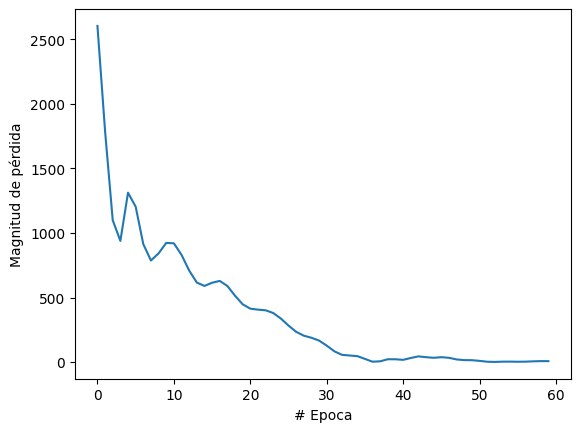

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

## Paso 7
#### Este código permitirá ver el valor predicho en grados Fahrenheit para una entrada dada en grados Celsius.

In [7]:
print("Hagamos una predicción!")
resultado = modelo.predict(np.array([100.0]))
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
El resultado es [[211.16597]] fahrenheit!


## Paso 7
#### Con este codigo podemos inspeccionar los parámetros internos del modelo después del entrenamiento, lo cual puede ser útil para la depuración o para entender mejor cómo el modelo está tomando decisiones.

In [8]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-1.942843e-01,  9.244350e-04, -9.831530e-01]], dtype=float32), array([ 1.9925104,  3.4842505, -3.6467857], dtype=float32)]
[array([[-0.14168279, -0.08593848,  1.1145728 ],
       [-0.690161  ,  0.9663837 ,  0.23279542],
       [ 0.73393863, -0.6667461 , -0.83518535]], dtype=float32), array([-3.681973 ,  3.5309496,  3.5809114], dtype=float32)]
[array([[-0.5713057],
       [ 1.1601909],
       [ 1.0575203]], dtype=float32), array([3.4207613], dtype=float32)]
